<a href="https://colab.research.google.com/github/DineshKumarVarada/ml/blob/main/exp_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

In [21]:
df = pd.read_csv('/content/Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [16]:
if 'Id' in df.columns:
    df = df.drop('Id', axis=1)

In [17]:
X = df.drop('Species', axis=1)
y = df['Species']

In [18]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [20]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [22]:
pca = PCA(n_components=2)
X_pca_all = pca.fit_transform(X)

In [23]:
y_pred_all = knn.predict(X)

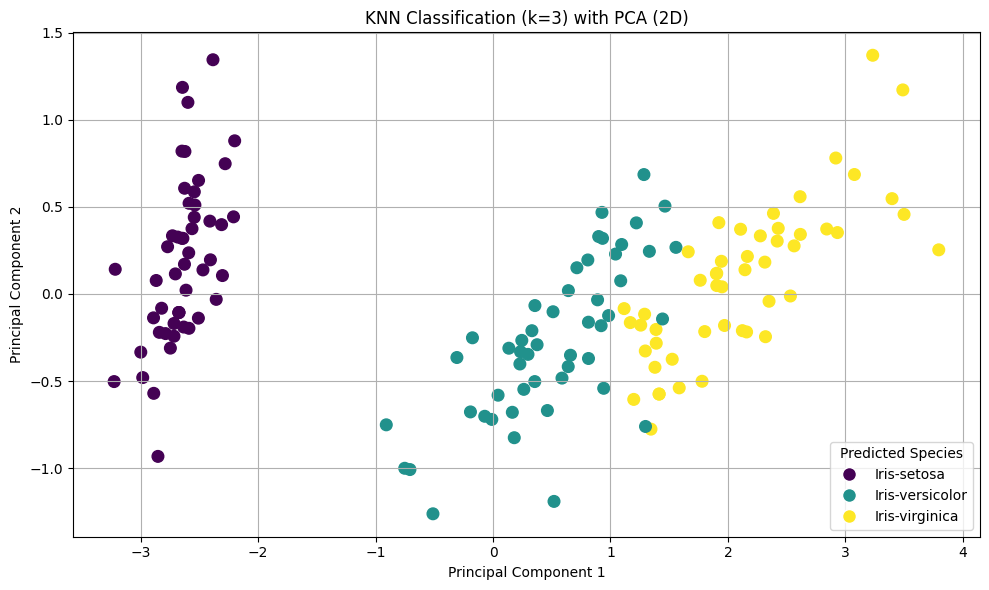

In [26]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca_all[:, 0], X_pca_all[:, 1], c=y_pred_all, cmap='viridis', s=70)
unique_preds = np.unique(y_pred_all)
legend_labels = [le.classes_[i] for i in unique_preds]
legend_handles = [plt.Line2D([0], [0], marker='o', color='w',
                             label=legend_labels[i],
                             markerfacecolor=plt.cm.viridis(unique_preds[i]/2), markersize=10)
                  for i in range(len(unique_preds))]

plt.legend(handles=legend_handles, title="Predicted Species")
plt.title("KNN Classification (k=3) with PCA (2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()